In [1]:
import numpy  as np
import pandas as pd
import matplotlib.pyplot as pl
import seaborn as sb

%matplotlib inline

In [2]:
tenda_sp = pd.read_csv('tenda_propostas_SP.csv',sep=';',decimal = ',')

In [3]:
tenda_sp.dtypes

Chave unica                       object
Preco Venda                      float64
Renda_Bruta_Familiar_Proposta    float64
FGTS_familiar_Proposta           float64
dtype: object

In [4]:
tenda_sp.head()

,Chave unica,Preco Venda,Renda_Bruta_Familiar_Proposta,FGTS_familiar_Proposta
0,PRO17071400035345011,150336.7,5207.9,23286.8
1,PRO17080803702346409,173569.3,2982.5,3649.7
2,PRO17091108602346411,150125.0,1718.4,15736.8
3,PRO17091609582346401,150839.7,2578.0,3027.2
4,PRO17100411912345879,155000.0,2098.4,4822.8


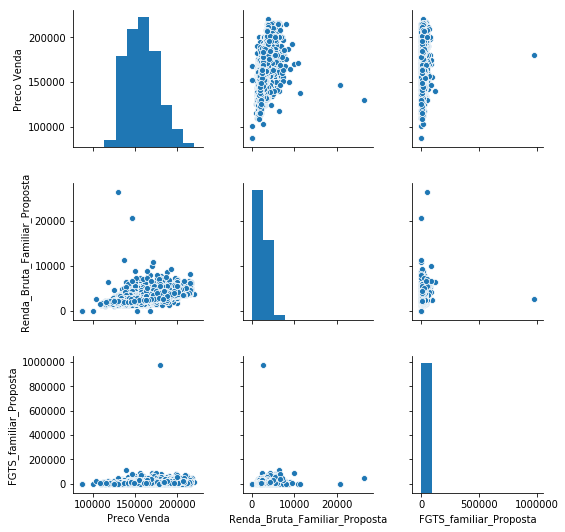

In [5]:
sb.pairplot(tenda_sp)

In [6]:
tenda_drop_sp = tenda_sp.drop(['Chave unica'],axis = 1)
tenda_drop_sp

,Preco Venda,Renda_Bruta_Familiar_Proposta,FGTS_familiar_Proposta
0,150336.7,5207.9,23286.8
1,173569.3,2982.5,3649.7
2,150125.0,1718.4,15736.8
3,150839.7,2578.0,3027.2
4,155000.0,2098.4,4822.8
5,164000.3,3264.0,7931.2
6,141681.4,2431.4,5926.8
7,147868.5,2433.3,4024.9
8,175064.9,2752.0,18420.5
9,171116.2,3528.3,10524.2


K_MEANS (RS)

In [7]:
from sklearn.cluster import KMeans

In [8]:
sb.set_style('darkgrid')

In [9]:
wcss = []

1 3945437859302.674
2 2312208339401.9214
3 1882886306979.7227
4 1636085695415.105
5 1483507419993.0173
6 608289207381.8494
7 524121032287.2481
8 451495723614.41095
9 402742435727.4813


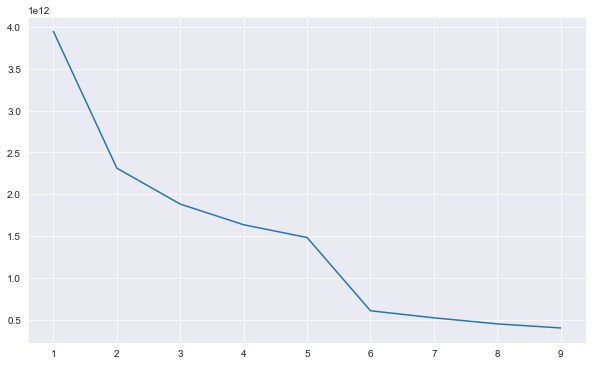

In [10]:
for i in range(1, 10):
    kmeans = KMeans(n_clusters = i, init = 'random')
    kmeans.fit(tenda_drop_sp)
    print (i,kmeans.inertia_)
    wcss.append(kmeans.inertia_)
pl.figure(figsize=(10, 6))    
pl.plot(range(1, 10), wcss)    

In [29]:
kmeans = KMeans(n_clusters=3,random_state=0)

In [30]:
kmeans.fit(tenda_drop_sp)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=3, n_init=10, n_jobs=None, precompute_distances='auto',
    random_state=0, tol=0.0001, verbose=0)

In [31]:
kmeans.labels_

array([0, 1, 0, ..., 1, 1, 0])

CLASSES CRIADAS 

In [32]:
tenda_sp['Kclasses'] = kmeans.labels_

In [33]:
tenda_sp. head(20)

,Chave unica,Preco Venda,Renda_Bruta_Familiar_Proposta,FGTS_familiar_Proposta,Kclasses
0,PRO17071400035345011,150336.7,5207.9,23286.8,0
1,PRO17080803702346409,173569.3,2982.5,3649.7,1
2,PRO17091108602346411,150125.0,1718.4,15736.8,0
3,PRO17091609582346401,150839.7,2578.0,3027.2,0
4,PRO17100411912345879,155000.0,2098.4,4822.8,0
5,PRO204836S0N6P6132196,164000.3,3264.0,7931.2,1
6,PRO224551D3H2X7344177,141681.4,2431.4,5926.8,0
7,PRO225976R2Z4M0346165,147868.5,2433.3,4024.9,0
8,PRO226208J9T7B6345385,175064.9,2752.0,18420.5,1
9,PRO227103V4G8Z7345479,171116.2,3528.3,10524.2,1


In [34]:
tenda_sp['Kclasses'] = kmeans.labels_

In [35]:
tenda_sp.Kclasses.value_counts()

0    3910
1    2985
2       1
Name: Kclasses, dtype: int64

PERFIL DOS CLUSTER'S GERADOS

In [36]:
tenda_sp.describe().round(2)

,Preco Venda,Renda_Bruta_Familiar_Proposta,FGTS_familiar_Proposta,Kclasses
count,6896.00,6896.00,6896.00,6896.00
mean,158472.73,2689.12,9780.99,0.43
std,18593.56,1054.58,15012.82,0.50
min,87411.40,0.00,0.00,0.00
25%,144000.00,2024.98,3251.30,0.00
50%,157206.55,2437.95,7286.30,0.00
75%,170073.00,3069.55,13071.82,1.00
max,220064.30,26391.40,973801.00,2.00


C:\ProgramData\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval
C:\ProgramData\Anaconda3\lib\site-packages\numpy\core\_methods.py:140: RuntimeWarning: Degrees of freedom <= 0 for slice
  keepdims=keepdims)
C:\ProgramData\Anaconda3\lib\site-packages\numpy\core\_methods.py:132: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\nonparametric\bandwidths.py:20: RuntimeWarning: invalid value encountered in minimum
  return np.minimum(np.std(X, axis=0, ddof=1), IQR)
C:\ProgramData\Anaconda3\lib\site-packages\numpy\core\fromnumeric.py:83: RuntimeWarnin

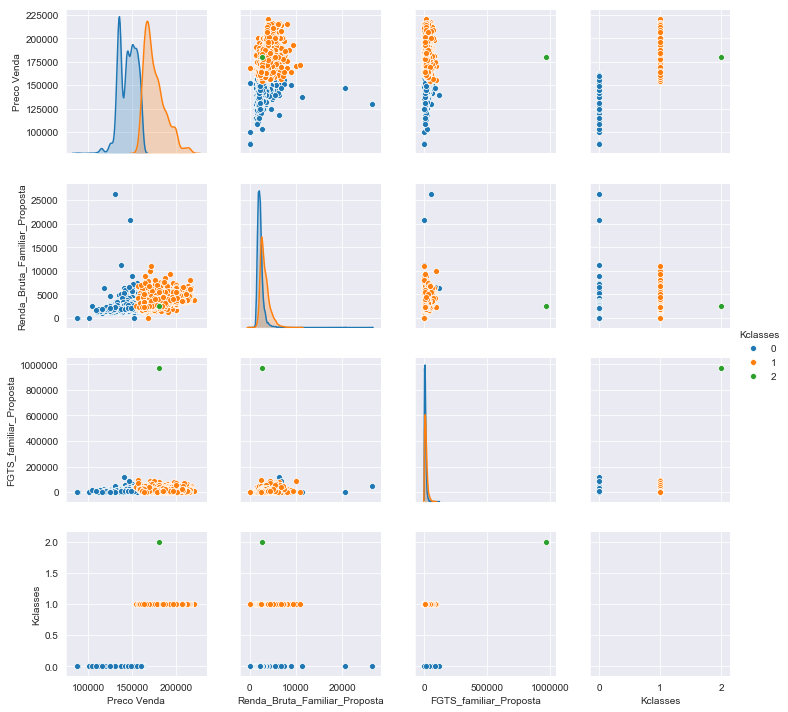

In [37]:
sb.pairplot(tenda_sp,hue='Kclasses')

EXPORTANDO DADOS

In [38]:
tenda_sp.to_csv('clustertenda_SP.csv',sep=';',decimal=',')